# Test power analysis for independence tests

In [1]:
import sys
sys.path.append('..')
import numpy as np
from tqdm.notebook import tqdm
import pickle
import os
import pandas as pd

from synthetic_data import generate_data
from independence import opt_lambda, test_power
from plots import plot_samples, plot_power, type_I_boxplot, plot_cross_corr, plot_delay

from warnings import filterwarnings
filterwarnings('ignore')

### Test hyperparameters
We start by specifying some hyperparameters for all of our tests.

In [2]:
# number of trials and permutations
n_trials = 200
n_perms = 1000

# number of samples and number of points functional data samples are (randomly) observed and discretised
n_obs = 100
n_preds = 100

# define discretised period
upper_limit = 1
periods = [0.1] # 1
pred_points = np.linspace(0, upper_limit, n_preds)

# number of Fourier basis functions and std of normal distribution of sampled coefficients
n_basis = 3
sd = 1

# statistical significance level
alpha = 0.05

In [3]:
# create folders to save results
if not os.path.exists('results'):
    os.mkdir('results')

if not os.path.exists('results/marginal'):
    os.mkdir('results/marginal')

if not os.path.exists('results/joint'):
    os.mkdir('results/joint')

if not os.path.exists('results/conditional'):
    os.mkdir('results/conditional')

## Marginal independence test

In [4]:
test = 'marginal'

# historical dependence is easier to detect the higher a is
a_list = [0, 0.2, 0.4, 0.6, 0.8, 1]

n_samples = [20, 40, 60]

We iterate over various values of $a$ and different kernels.

In [ ]:
type_II_errors = {}

for p in periods:
    print('Period T:', p)
    type_II_errors[p] = {}
    for n_sample in tqdm(n_samples):
        print('Sample size:', int(n_sample))
        type_II_errors[p][int(n_sample)] = []
        for a in a_list:
            print('a:', a)
            # generate synthetic data
            X, Y = generate_data(dep=test, n_samples=int(n_sample), n_trials=n_trials, n_obs=n_obs, n_preds=n_preds, period=p, a=a, upper_limit=upper_limit, n_basis=n_basis, sd=sd)
            
            # conduct n tests
            power = test_power(X=X, Y=Y, n_trials=n_trials, n_perms=n_perms, alpha=alpha, K='K_ID', test=test)
            type_II_errors[p][n_sample].append(power)
            print('Test power:', power)
            print('----------')
        print('----------')
    
power_hist = open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'wb')
pickle.dump(type_II_errors, power_hist)
power_hist.close()

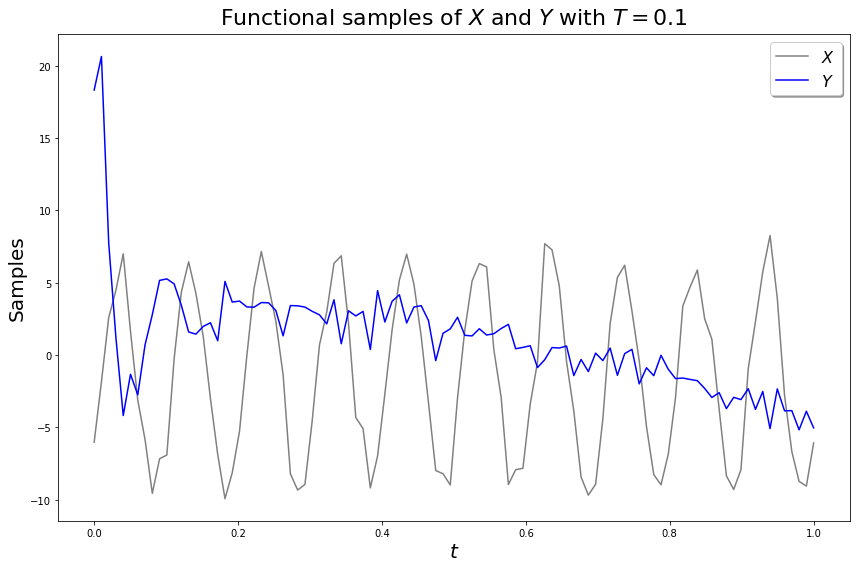

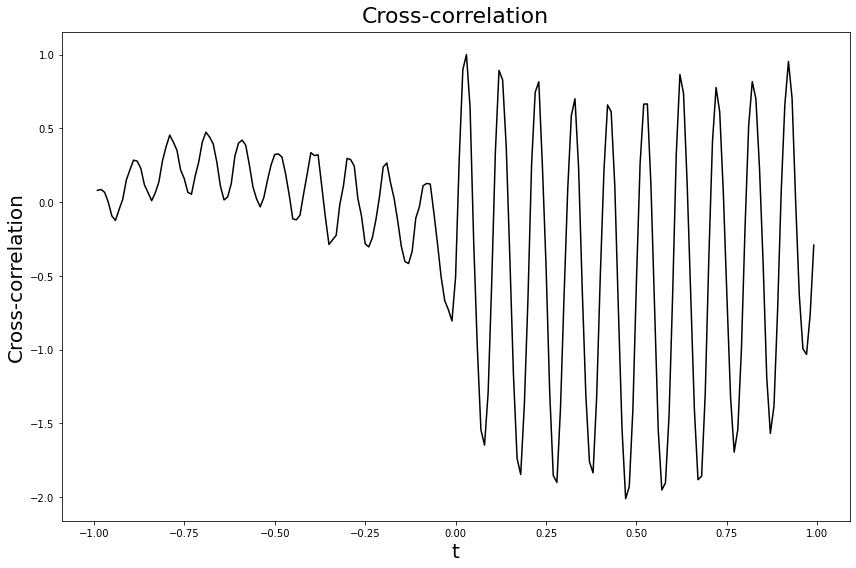

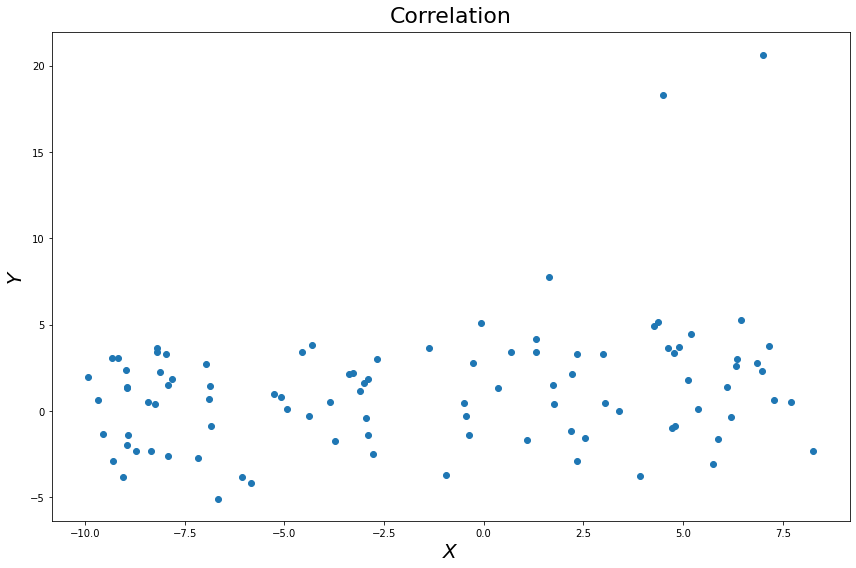

In [5]:
# plot n samples
p = 0.1
X, Y = generate_data(dep=test, n_samples=20, n_trials=1, n_obs=100, n_preds=100, period=p, a=1, upper_limit=1, n_basis=3, sd=1)
n = 1
lag = 3

#np.savetxt("X.csv", X, delimiter=",")
#np.savetxt("Y.csv", Y, delimiter=",")

#X = np.genfromtxt("X_CCM.csv", delimiter=",")
#Y = np.genfromtxt("Y_CCM.csv", delimiter=",")

plot_samples(X[:n], Y[:n], pred_points, upper_limit, p)
plot_cross_corr(X[:n].squeeze(), Y[:n].squeeze(), p)
plot_delay(X[:n].squeeze()[lag:], Y[:n].squeeze()[:-lag], p)

In [ ]:
type_II_errors = pickle.load(open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'rb'))

In [ ]:
type_II_errors

In [ ]:
# power over strength of dependence
plot_power(type_II_errors, n_samples, a_list, n_trials, test, periods)

## Joint independence test

In [ ]:
test = 'joint'

# number of variables in network
n_vars = 4

# historical dependence is easier to detect the higher a is
a_list = [0, 0.2, 0.4, 0.6, 0.8, 1]

n_samples = [20, 40, 60]

upper_limit = 1
pred_points = np.linspace(0, upper_limit, n_preds)

In [ ]:
type_II_errors = {}

for p in periods:
    print('Period T:', p)
    type_II_errors[p] = {}
    for n_sample in tqdm(n_samples):
        print('Sample size:', int(n_sample))
        type_II_errors[p][int(n_sample)] = []
        for a in a_list:
            print('a:', a)
            # generate synthetic data
            edges_dict, X_dict = generate_data(dep=test, n_samples=int(n_sample), n_trials=n_trials, n_obs=n_obs, n_preds=n_preds, period=p, n_vars=n_vars, a=a, upper_limit=upper_limit, n_basis=n_basis, sd=sd)

            # conduct n trials
            power = test_power(X=X_dict, edges_dict=edges_dict, n_trials=n_trials, n_perms=n_perms, alpha=alpha, K='K_ID', test=test)
            type_II_errors[p][n_sample].append(power)
            print('Test power:', power)
            print('----------')
        print('----------')
    
power_hist = open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'wb')
pickle.dump(type_II_errors, power_hist)
power_hist.close()

In [ ]:
# plot n samples
n = 10
print(edges_dict[0])
plot_samples(X_dict[0][3][:n], pred_points, upper_limit)

In [ ]:
type_II_errors = pickle.load(open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'rb'))

In [ ]:
type_II_errors

In [ ]:
plot_power(type_II_errors, n_samples, a_list, n_trials, test, periods)

## Conditional independence test

In [6]:
test = 'conditional'

# number of conditional variables + samples
n_vars = [1, 2, 3, 4, 5, 6, 7, 8]
n_samples = [100, 200, 300]

# # historical dependence between X and Y is easier to detect the higher a' is
a_prime_list = [0, 0.2, 0.4, 0.6, 0.8, 1]

# range of possible values for lambda
lambs = [1e-4, 1.5e-4, 2.5e-4, 5e-4, 7.5e-4, 1e-3, 1.5e-3, 2.5e-3, 5e-3, 7.5e-3, 
         1e-2, 1.5e-2, 2.5e-2, 5e-2, 7.5e-2, 1e-1]

n_pretests = 100
n_steps = 50

analyse = True

In [84]:
n_trials = 20

n_vars = [7]
n_samples = [300]

a_prime_list = [0, 1]

lambs = 3.5e-2

In [85]:
type_II_errors = {}
lamb_opts = {}

for p in periods:
    print('Period T:', p)
    type_II_errors[p] = {}
    lamb_opts[p] = {}
    for i_n, n_sample in enumerate(n_samples):
        print('Sample size:', int(n_sample))
        type_II_errors[p][int(n_sample)] = {}
        lamb_opts[p][int(n_sample)] = {}
        for i_d, d in enumerate(n_vars):
            print('Number of conditional variables:', d)
            type_II_errors[p][int(n_sample)][d] = []
            lamb_opts[p][int(n_sample)][d] = []
            for i_a, a_prime in enumerate(a_prime_list):
                print("a':", a_prime)
                # generate synthetic data
                X, Y, Z = generate_data(dep=test, n_samples=int(n_sample), n_trials=n_trials, n_obs=n_obs, n_preds=n_preds, period=p, n_vars=d, a=1, a_prime=a_prime, upper_limit=upper_limit, n_basis=n_basis, sd=sd)
                
                if i_a == 0:
                    #lamb_opt, rejects_opt = opt_lambda(X[:n_sample], Y[:n_sample], Z[:, :n_sample, :], lambs, n_pretests, n_perms, n_steps, alpha, K='K_ID')
                    lamb_opt = lambs
                    
                # conduct n trials
                power = test_power(X=X, Y=Y, Z=Z, n_trials=n_trials, n_perms=n_perms, alpha=alpha, K='K_ID', test=test, lamb_opt=lamb_opt, analyse=analyse)
                type_II_errors[p][n_sample][d].append(power)
                lamb_opts[p][n_sample][d].append(lamb_opt)
                print('Test power:', power)
                print('----------')
            print('----------')
    print('----------')

"""
power_hist = open('results/{}/test_power_hist_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')
pickle.dump(type_II_errors, power_hist)
power_hist.close()
lambs_opt_hist = open('results/{}/lambs_opt_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')
pickle.dump(lamb_opts, lambs_opt_hist)
lambs_opt_hist.close()
"""

Period T: 0.1
Sample size: 300
Number of conditional variables: 7
a': 0


  0%|          | 0/20 [00:00<?, ?it/s]

0.0 0.19799999999999995
0.0 0.645
0.0 0.45599999999999996
0.0 0.988
0.0 0.904
0.0 0.43700000000000006
0.0 0.473
0.0 0.634
0.0 0.588
0.0 0.906
0.0 0.5449999999999999
0.0 0.86
0.0 0.995
0.0 0.992
0.0 0.29900000000000004
0.0 0.5429999999999999
0.0 0.923
0.0 0.885
0.0 0.30299999999999994
0.0 0.907
Test power: 0.0
----------
a': 1


  0%|          | 0/20 [00:00<?, ?it/s]

0.0 0.34099999999999997
1.0 0.0030000000000000027
1.0 0.0009999999999998899
1.0 0.0
1.0 0.020999999999999908
1.0 0.0
1.0 0.015000000000000013
1.0 0.0030000000000000027
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.2340000000000001
1.0 0.0009999999999998899
1.0 0.007000000000000006
0.0 0.2809999999999999
0.0 0.364
1.0 0.0
1.0 0.008000000000000007
1.0 0.0
1.0 0.0
Test power: 0.8
----------
----------
----------


"\npower_hist = open('results/{}/test_power_hist_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')\npickle.dump(type_II_errors, power_hist)\npower_hist.close()\nlambs_opt_hist = open('results/{}/lambs_opt_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')\npickle.dump(lamb_opts, lambs_opt_hist)\nlambs_opt_hist.close()\n"

In [ ]:
type_II_errors = pickle.load(open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'rb'))
lamb_opts = pickle.load(open('results/{}/lambs_opt_{}.pkl'.format(test, test), 'rb'))

In [ ]:
lamb_opts

In [ ]:
plot_power(type_II_errors, n_samples, a_prime_list, n_trials, test, periods=periods, n_vars=8, lamb_opts=lamb_opts)

#### Make boxplots for the type-I error rates over various values for $\lambda$ and sample sizes.

In [ ]:
df = pd.read_pickle('tests/results/conditional/type_I_boxplots_df2.pkl')

In [ ]:
type_I_boxplot(df)

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from synthetic_data import beta

In [ ]:
s = np.linspace(0, 1, 100)
t = np.linspace(0, 1, 100)

s, t = np.meshgrid(s, t)

In [ ]:
def b(s, t):
    c_1 = np.random.uniform(0.25, 0.75)
    c_2 = np.random.uniform(0.25, 0.75)
    return 4*(s - c_1) ** 2 - 4*(t - c_2) ** 2

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15, 15))

#B = beta(s, t, c_1=1, c_2=1, linear=0)
B = b(s, t)

# Plot the surface.
surf = ax.plot_surface(s, t, B, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('s')
ax.set_ylabel('t')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
from scipy.integrate import trapezoid

In [ ]:
x = np.linspace(0, 1, 10)
y = x**2

In [ ]:
trapezoid(y, x)

In [ ]:
np.sum(y) / 10